<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Clustering-in-Python/blob/master/06_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **K-Means Clustering**

- K Means allows us to define the required number of clusters
- Now we first start by taking an arbitrary number of k. Let’s say we take k=3 (k is choosen from **elbow method**)
- Algorithm chooses three random points as the centroid 
- It also computes Euclidean distances from the centroid to all other data points
- The algorithm after measuring the distances of all the data points from the centroid associates each data point with a centroid based on its proximity
- To measure how good the three clusters are seperated, we use **Silhouette Score**

#### **Elbow Method**
- In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS(Within-Cluster Sum of Square)
- **WCSS is the sum of squared distance between each point and the centroid in a cluster**
- WCSS value is largest when K = 1. 

####  **Silhouette Score**
- Clusters are well apart from each other as the silhouette score is closer to 1
- Silhouette Coefficient score is a metric used to calculate the goodness of a clustering technique 
- Its value ranges from -1 to 1.
  1. **Score = 1: Means clusters are well apart** from each other and clearly distinguished.
  2. **Score = 0: Means clusters are indifferent**, or we can say that the distance between clusters is not significant.
  3. **Score = -1: Means clusters are assigned in the wrong way.**

In [ ]:
# Importing Libraries

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image

uploaded = files.upload() # To import image from computer/tab

Saving 0232A118-EF98-410D-B996-6A0769F9712F.png to 0232A118-EF98-410D-B996-6A0769F9712F.png


K Means ALGORITHIM STEPS :


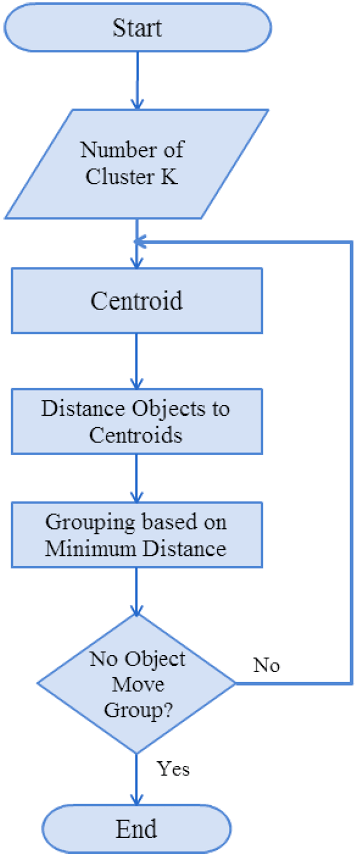

In [ ]:
print('K Means ALGORITHIM STEPS :')
Image('0232A118-EF98-410D-B996-6A0769F9712F.png',height = 300)

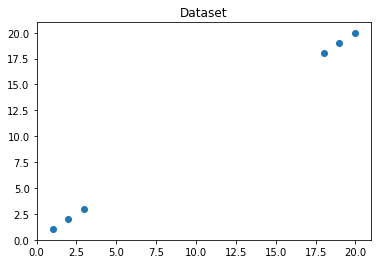

In [ ]:
# Lets take an small example
x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

In [ ]:
print('For ONE Cluster, all data points should be assigned to 1 Cluster\n')

kmeans = KMeans(n_clusters = 1, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For ONE Cluster, all data points should be assigned to 1 Cluster

Clusters assigned to each datapoints :
0    0
1    0
2    0
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 875.0


In [ ]:
print('For TWO Cluster, all data points should be assigned to 2 Clusters\n')

kmeans = KMeans(n_clusters = 2, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For TWO Cluster, all data points should be assigned to 2 Clusters

Clusters assigned to each datapoints :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 8.0


In [ ]:
print('For THREE Cluster, all data points should be assigned to 3 Clusters\n')

kmeans = KMeans(n_clusters = 3, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For THREE Cluster, all data points should be assigned to 3 Clusters

Clusters assigned to each datapoints :
0    1
1    1
2    1
3    0
4    2
5    2
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 5.0


WCSS Formula

In K Means, Distance measure is Euclidean Distance Metric


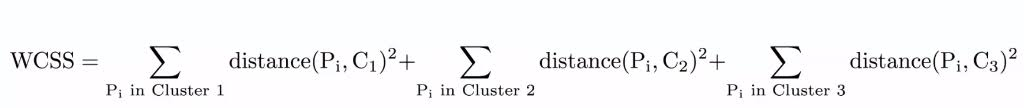

In [ ]:
print('WCSS Formula\n')
print('In K Means, Distance measure is Euclidean Distance Metric')
Image('C7423E3E-0827-4D5A-9AF4-85291A8637ED.jpeg')

For cluster = 1, SSE/WCSS is 875.0
For cluster = 2, SSE/WCSS is 8.0
For cluster = 3, SSE/WCSS is 5.0
For cluster = 4, SSE/WCSS is 2.0
For cluster = 5, SSE/WCSS is 1.0


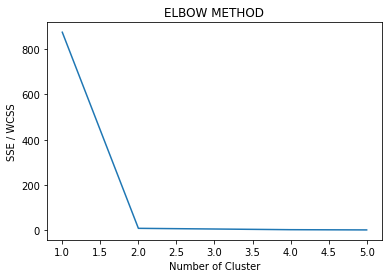

Optimum Number of Cluster : 2


In [ ]:
# ELBOW METHOD

# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters
data = pd.DataFrame({'x':x_axis, 'y':y_axis})

sse = {}

for k in range(1,6): # Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  data['clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()

print('Optimum Number of Cluster : 2')

#### **Silhouette Score**
- It refers to a method of interpretation and validation of consistency within clusters of data. 
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 
- The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
- If most objects have a high value, then the clustering configuration is appropriate.
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

Silhouette Score Example



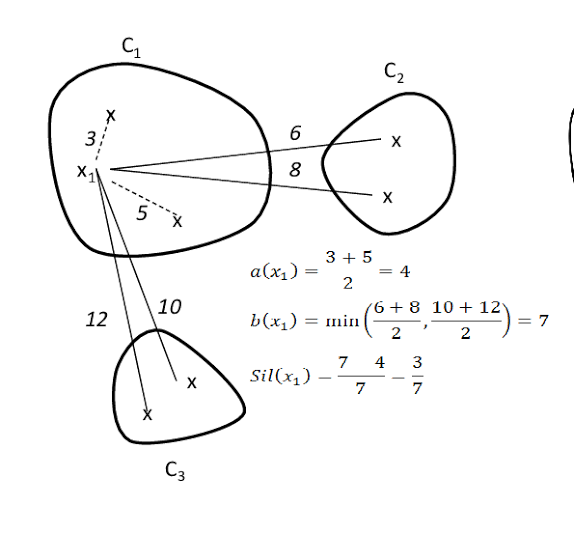

In [ ]:
print('Silhouette Score Example\n')
Image('F936FB3C-5CD7-4269-93BB-A4C2CEFB75B0.png',height = 300)

Elbow Method VS Silhouette Score 



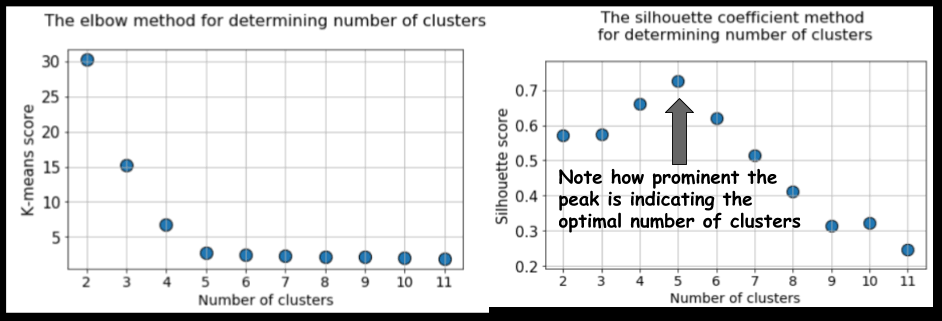

In [ ]:
print('Elbow Method VS Silhouette Score \n')
Image('404FF6A7-9BC8-4DB7-921B-5986E1EA8E99.png',height = 200)

In [ ]:
# Silhouette Score

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

for n_clusters in range(0,6):# Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  label = kmeans.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(n_clusters,sil_coeff))

print('\n It is same for every cluster, so choose from Elbow Method')

For cluster= 0, Silhouette Coefficient is 0.08333333333333333
For cluster= 1, Silhouette Coefficient is 0.08333333333333333
For cluster= 2, Silhouette Coefficient is 0.08333333333333333
For cluster= 3, Silhouette Coefficient is 0.08333333333333333
For cluster= 4, Silhouette Coefficient is 0.08333333333333333
For cluster= 5, Silhouette Coefficient is 0.08333333333333333

 It is same for every cluster, so choose from Elbow Method


In [ ]:
# Lets Take another Dataset : IRIS Dataset
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Preparing Data
# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
# Now we will separate the target variable from the original dataset 
# And again convert it to an array by using numpy
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
print(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_1 = dict(zip(unique, counts))
freq_1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


{0: 50, 1: 50, 2: 50}

In [ ]:
# Filtering Setosa

Setosa = iris_data['Type'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

Filtering Setosa, True means its Setosa and False means Non Setosa
0    True
1    True
2    True
3    True
4    True
Name: Type, dtype: bool
Top 6 Rows of Setosa
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
Last 6 Rows of Setosa
    sepal length (cm)  sepal width (cm)
45                4.8               3.0
46                5.1               3.8
47                4.6               3.2
48                5.3               3.7
49                5.0               3.3


Setosa for 2D Plot
X Axis points
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
Y Axis Points
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]




(2.0, 4.5)

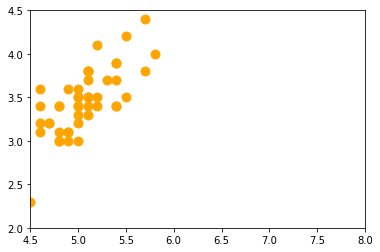

In [ ]:
# Filtering Setosa for 2D Plot 

print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0 
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:
# Filtering Versicolour

Versi = iris_data['Type'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())

Filtering Versicolour, True means its Versicolour and False means Non Versicolour
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
50                7.0               3.2
51                6.4               3.2
52                6.9               3.1
53                5.5               2.3
54                6.5               2.8
Last 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
95                5.7               3.0
96                5.7               2.9
97                6.2               2.9
98                5.1               2.5
99                5.7               2.8


Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




(2.0, 4.5)

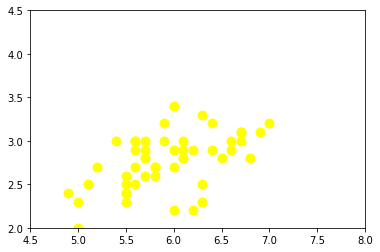

In [ ]:
# Filtering Versicolour for 2D Plot 

print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [ ]:
# Filtering Virginica

Virginica = iris_data['Type'] == 2
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print(Virginica.head())
print("Top 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2[Virginica_v2.columns[0:2]].head())
print("Last 6 Rows of Virginica")
print(Virginica_v2[Virginica_v2.columns[0:2]].tail())

Filtering Virginica, True means its Virginica and False means Non Virginica
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
100                6.3               3.3
101                5.8               2.7
102                7.1               3.0
103                6.3               2.9
104                6.5               3.0
Last 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0


Virginica for 2D Plot
X Axis points
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
Y Axis Points
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]




(2.0, 4.5)

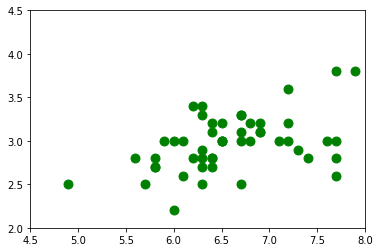

In [ ]:
# Filtering Virginica for 2D Plot

print("Virginica for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 2,0])
print("Y Axis Points")
print(iris_X[iris_Y == 2,1])
print('\n')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

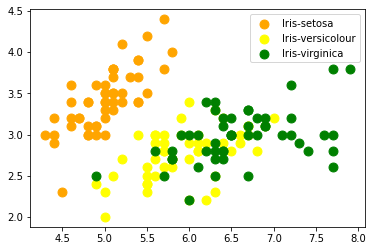

In [ ]:
# Visualise Classes all at once

# In this Iris dataset, we have three classes (0,1,2)
# We visualise these classes in a 2-D graph 
# This will help us in comparing the original classes with the clusters created 
# Plot the three type of flowers on a graph

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# We find that we have three classes with two types of Iris flowers overlapping each other

For cluster = 1, SSE/WCSS is 681.3706
For cluster = 2, SSE/WCSS is 152.34795176035792
For cluster = 3, SSE/WCSS is 78.85144142614601
For cluster = 4, SSE/WCSS is 57.25600931571815
For cluster = 5, SSE/WCSS is 46.44618205128205
For cluster = 6, SSE/WCSS is 39.03998724608725
For cluster = 7, SSE/WCSS is 34.299712121212124
For cluster = 8, SSE/WCSS is 30.014398496240602
For cluster = 9, SSE/WCSS is 28.036906353450473
For cluster = 10, SSE/WCSS is 26.53452922077922


Text(0, 0.5, 'WCSS')

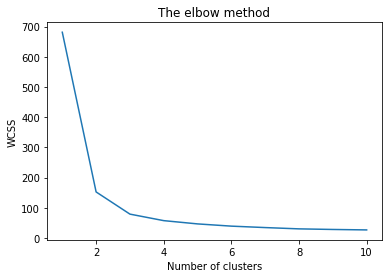

In [ ]:
# K Means

# Deciding Value of K
# The most crucial aspect of K-Means clustering is deciding the value of K
# We do this by performing Elbow Analysis 

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Inference : 
# Cluster 1 means only one cluster, inshort variance of the dataset
# Variance in Cluster 1 = 681
# Cluster 2 means two cluster i.e, Variance in Cluster 2 = 152
# Same way for Variance in Cluster 3 = 78
# Vairance in Cluster is also knows as Within Cluster Sum of Square (WCSS)
# Normally as we increase number of clusters, within Sum of Square will decrease 

# In the elbow graph, we look for the points where the drop falls and the line smoothens out
# In the above graph, this happens for k=3. 
# Another way of understanding this is that we note the point at which the WCSS is less 
# and try to find the number of clusters for our dataset. 
# We see that at the number of clusters = 3, WCSS is less than 100, which is good for us. 
# So we take k =3.
# We will check Silhouette Coefficient also for 3 and 4 Clusters respectively

In [ ]:
# Running K-Means Model

# We now run K-Means clustering for obtaining a 3 cluster solution.
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(iris_X)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


{0: 62, 1: 50, 2: 38}

Original Cluster Frequency {0: 50, 1: 50, 2: 50}
K Means Output Cluster Frequency {0: 62, 1: 50, 2: 38}
Silhouette Score for 3 Clusters 0.5528190123564091




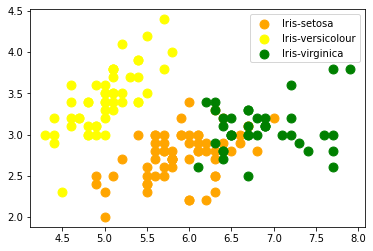

In [ ]:
# Visualizing Output

print('Original Cluster Frequency',freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
print('K Means Output Cluster Frequency',dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters',silhouette_score(iris_X,pred_kmeans))
print("\n")

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

plt.scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# When compared to the original classes we find that the observations of the class label 
# "1" has been correctly formed into a separate well-defined cluster
# however, for the other two classes, clusters are not as correct. 
# This is mainly because, in the original dataset, these two class labels were overlapping each other 
# which makes it difficult for the clustering algorithm as it works best for clear neat separate observations. 
# Still, the clusters have been formed, more or less correctly
# Silhouette Score = 0.55 which is not bad enough (should be tend to 1)

In [ ]:
# If we take 4 Cluster to Check Silhouetter Score
cluster_Kmeans = KMeans(n_clusters=4)
model_kmeans = cluster_Kmeans.fit(iris_X)
labels_1 = model_kmeans.labels_
print("Silhouette Score for 4 Cluster")
print(silhouette_score(iris_X,labels_1))
print('\n')

# Inference : 
# As we can observe Score is 0.49 (decrease so reject 4 Cluster)
# Optimal number of cluster=3 as its silhouette score is greater than that of 4 clusters
wcss = []

for k in range(2,20):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(iris_X)
  label = kmeans.labels_
  sil_coeff = silhouette_score(iris_X,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

Silhouette Score for 4 Cluster
0.4980505049972867


For cluster= 2, Silhouette Coefficient is 0.681046169211746
For cluster= 3, Silhouette Coefficient is 0.5528190123564091
For cluster= 4, Silhouette Coefficient is 0.4980505049972867
For cluster= 5, Silhouette Coefficient is 0.4887488870931048
For cluster= 6, Silhouette Coefficient is 0.3664804028900824
For cluster= 7, Silhouette Coefficient is 0.3566882476581684
For cluster= 8, Silhouette Coefficient is 0.3598224057544486
For cluster= 9, Silhouette Coefficient is 0.3311879738342126
For cluster= 10, Silhouette Coefficient is 0.31176492992430954
For cluster= 11, Silhouette Coefficient is 0.3239524663368962
For cluster= 12, Silhouette Coefficient is 0.30692302322609377
For cluster= 13, Silhouette Coefficient is 0.3011211881105722
For cluster= 14, Silhouette Coefficient is 0.2808283122551038
For cluster= 15, Silhouette Coefficient is 0.29543493729805287
For cluster= 16, Silhouette Coefficient is 0.3089537581524615
For cluster= 17, Silhoue